# Audio Recommendation Algorithm 

Within this project, we will take a look at a real dataset of songs from 1950 to 2011. 

This dataset contains a mix of lyrical and continuous variables pulled from a 2020 research paper titled Music Dataset: Lyrics and Metadata from 1950 to 2019. Review the list below to find out more about this datasets columns:

artist_name: The name of the artist

track_name: The name of the song

release_date: When this song was released

genre: The categorical genre of this song

lyrics: The pre-tokenized lyrics of this song. Disclaimer: note that as this is real-world data, lyrical content is often obscene. 

len:  The number of words in the lyrics of this song

dating: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with dating.

violence: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with violence.

world/life: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the world or life in general terms.

night/time: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do night-life or time.

shake the audience: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with provocative feeling.

family/gospel: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with family-oriented content or the gospel.

romantic: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with romantic feeling.

communication: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with communication (either in romantic terms or otherwise).

obscene: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc).

music: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with music (music about music, basically).

movement/places: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with movement or various locations.

light/visual perceptions: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the sun or other physical weather-related patterns.

family/spiritual: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

sadness: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

feelings: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with emotions, either positive or negative.

topic: The categorical label of lyrical content

age: A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.


In [290]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import FuncFormatter


#Importing the data 
file_path = r"data/train.csv"

df = pd.read_csv(file_path)

#Displaying the first 5 rows of data 
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [286]:
df.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64

In [289]:
df.shape

(28362, 24)

In [288]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


---

## **Univariate Analysis**

In [292]:
#Value counts for Artist 

value_counts_Artist = df['artist_name'].value_counts().to_frame()
#Lets pull the top 10 artist and assign it to a variable 
df1= value_counts_Artist.head(10)

df1

,count
artist_name,
johnny cash,190
ella fitzgerald,188
dean martin,146
willie nelson,131
george jones,107
elvis presley,97
dolly parton,96
waylon jennings,95
george strait,92


In [23]:
value_counts_Artist.describe

<bound method NDFrame.describe of                  count
artist_name           
johnny cash        190
ella fitzgerald    188
dean martin        146
willie nelson      131
george jones       107
...                ...
stigmato inc         1
plej                 1
slow train soul      1
oi va voi            1
$uicideboy$          1

[5424 rows x 1 columns]>

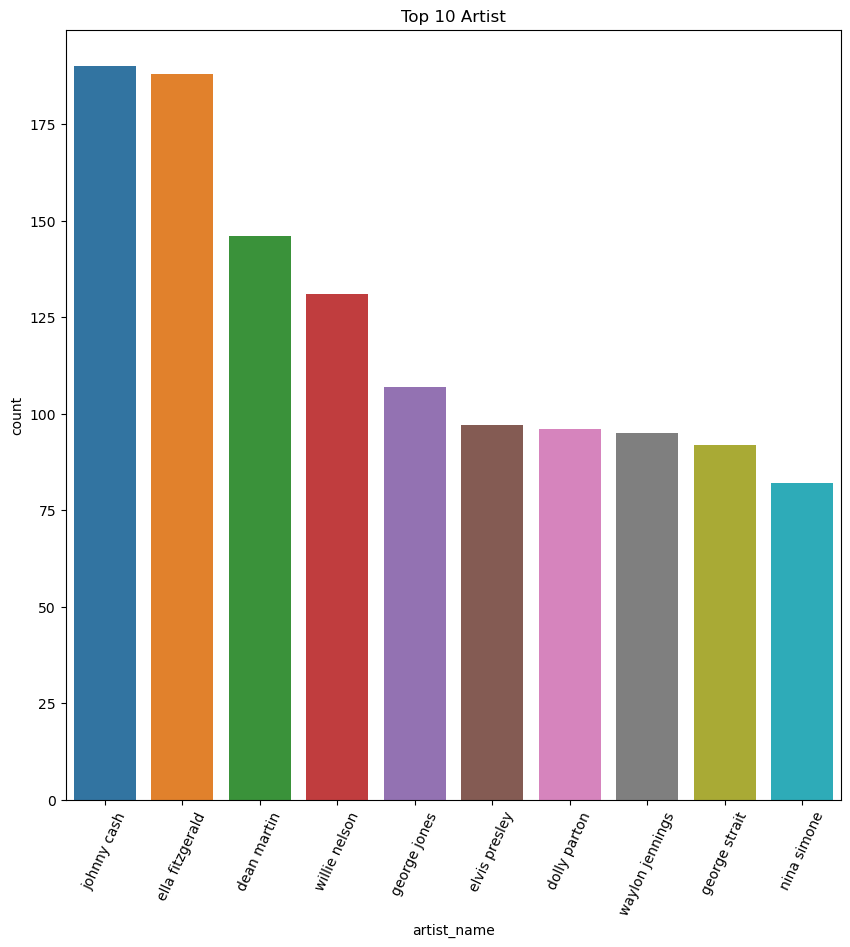

In [112]:
#Bar plot for top 10n artist
sns.barplot(data=df1, x= "artist_name", y="count", hue="artist_name", legend= False)
plt.title("Top 10 Artist")
plt.xticks(rotation=65)
None

### Johnny Cash and Ella Fitzgerald are the 2 most popular artist in this set 

In [25]:
#Lets find the value counts of genre 

value_counts_genre = df['genre'].value_counts().to_frame()

value_counts_genre

,count
genre,
pop,7038
country,5444
blues,4603
rock,4032
jazz,3844
reggae,2497
hip hop,904


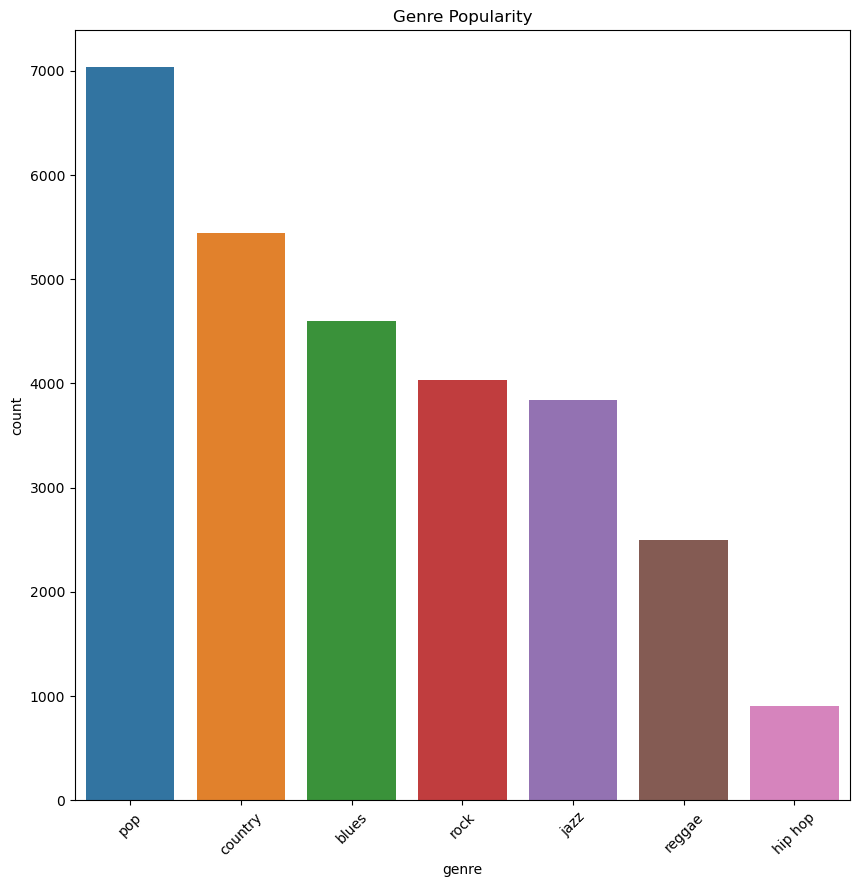

In [326]:
# Lets display the count of all the genres 
sns.barplot(x='genre', y='count', data=value_counts_genre , hue= "genre", legend= False)
plt.xticks(rotation=45)
plt.title("Genre Popularity")
None

### Pop and Country are the two most popular genre's in this dataset
###   -Hip Hop being the least as its widely considered to have been born in 1973, this data beings in 1950 so this makes sense 

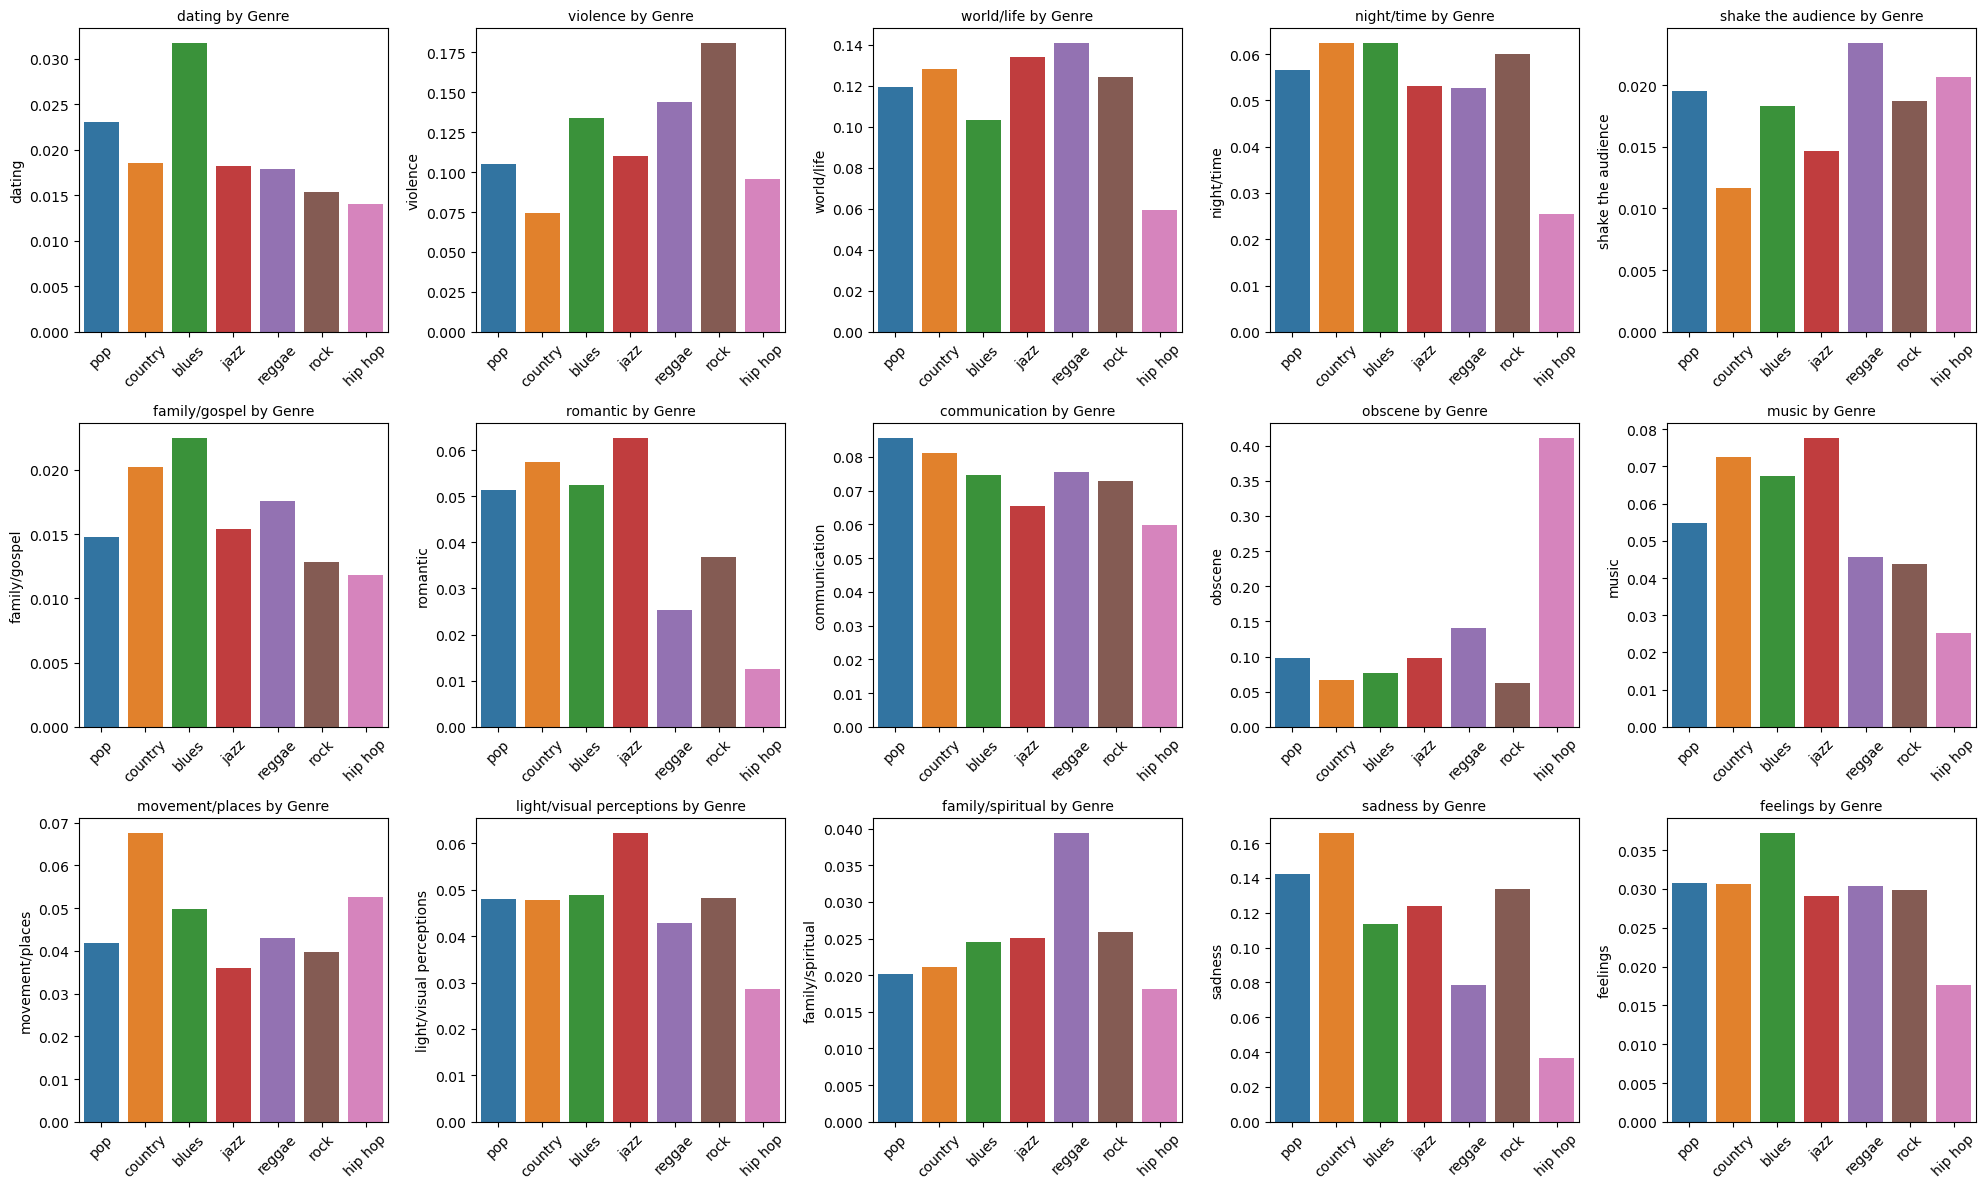

In [325]:
# List of lyrical features to compare across different music genres
features = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
    'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 
    'family/spiritual', 'sadness', 'feelings', 
]

# Create a 3x5 grid of subplots to visualize each feature
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3 rows x 5 columns layout

# Loop through each feature and create a barplot by genre
for idx, feature in enumerate(features):
    row = idx // 5  # Determine row index in subplot grid
    col = idx % 5   # Determine column index in subplot grid
    ax = axes[row, col]

    # Plot the average value of the feature per genre using seaborn barplot
    sns.barplot(data=df, x='genre', y=feature, ax=ax, errorbar=None, hue="genre")
    ax.set_title(f'{feature} by Genre', fontsize=10)  # Set subplot title
    ax.set_xlabel('')  # Remove x-axis label for cleaner layout
    ax.set_ylabel(feature)  
    ax.tick_params(axis='x', rotation=45)  

# Adjust spacing between subplots to prevent overlapping
plt.tight_layout()
None


## Features vs Genres 
### Some thoughts 
### Hip Hop stands out with the highest level of obscenity
- Compared to other genres, hip hop lyrics have way more obscene words. It's a big difference that really jumps out
- This might reflect the genre's raw, unfiltered storytelling 
### Jazz and Blues talk more about love and relationships
- These two genres lean heavily into themes like dating and romance
- Fits with their emotional, expressive style — often telling stories about love, heartbreak, and everything in between
### Rock and Hip Hop mention violence more than others
- Lyrics in rock and hip hop tend to have more references to conflict or aggression
- That intensity matches the energy of the music itself and might say something about the kinds of stories or struggles being expressed
### Reggae really emphasizes spiritual and family values
- Reggae songs often include messages about faith, family, and togetherness
- It's a strong theme that lines up with the genre’s roots in spirituality and social awareness
### Reggae and hip hop shake the audience 
- fast up beat and fun, this makes sense for these 2 genres to be leading the charge here 
### Pop and Country carry a lot of sadness and feelings 
- Country there is no suprise, with pop having a lot of upbeat songs over the yeats, carrying sadness is shocking here 
- They’re rooted in storytelling and often tap into personal or heartfelt experiences
- would have expected for blues to be higher here 
### Some topics, like life, communication, and visuals, are everywhere
- Themes like world/life, communication, or visual imagery show up pretty evenly across all genres
- They don’t define any one genre, but they add richness to lyrics and paint a fuller picture of what songs are saying

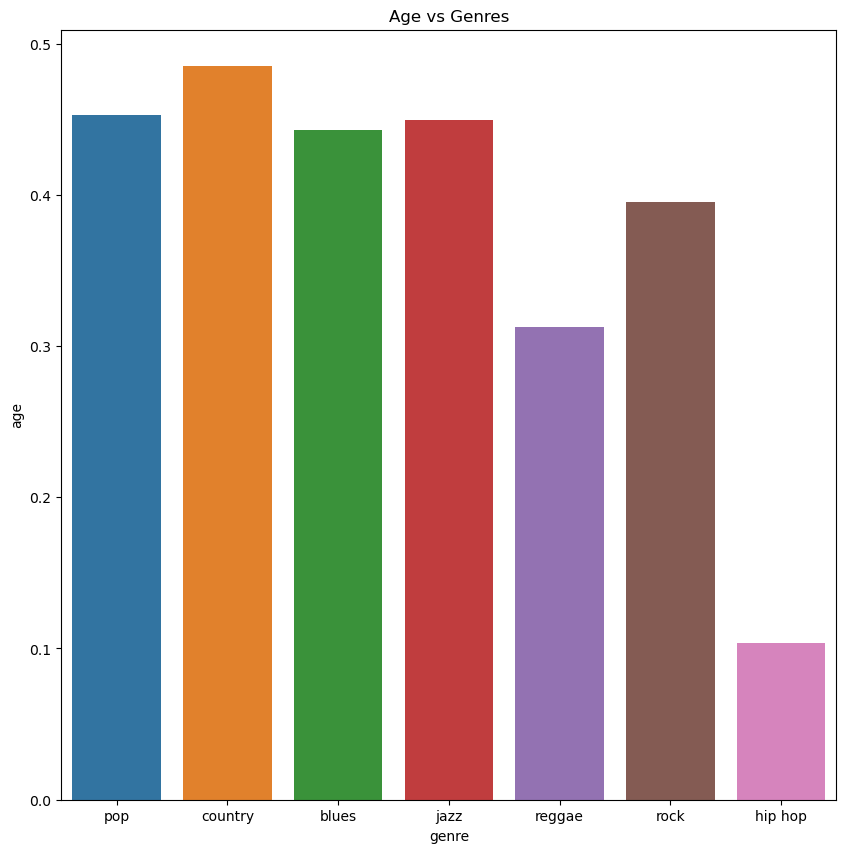

In [324]:
# Here we are comparing age vs Genre
sns.barplot(data= df, x= "genre", y="age", hue="genre", legend= None, errorbar=None)
plt.title("Age vs Genres")
None


### * As a reminder age is represented in this dataset by A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.

- With that being said here we can see that hip hop & reggae represent for the newer songs 
-  Pop, Country, blues, jazz, & Rock represent the older songs. 

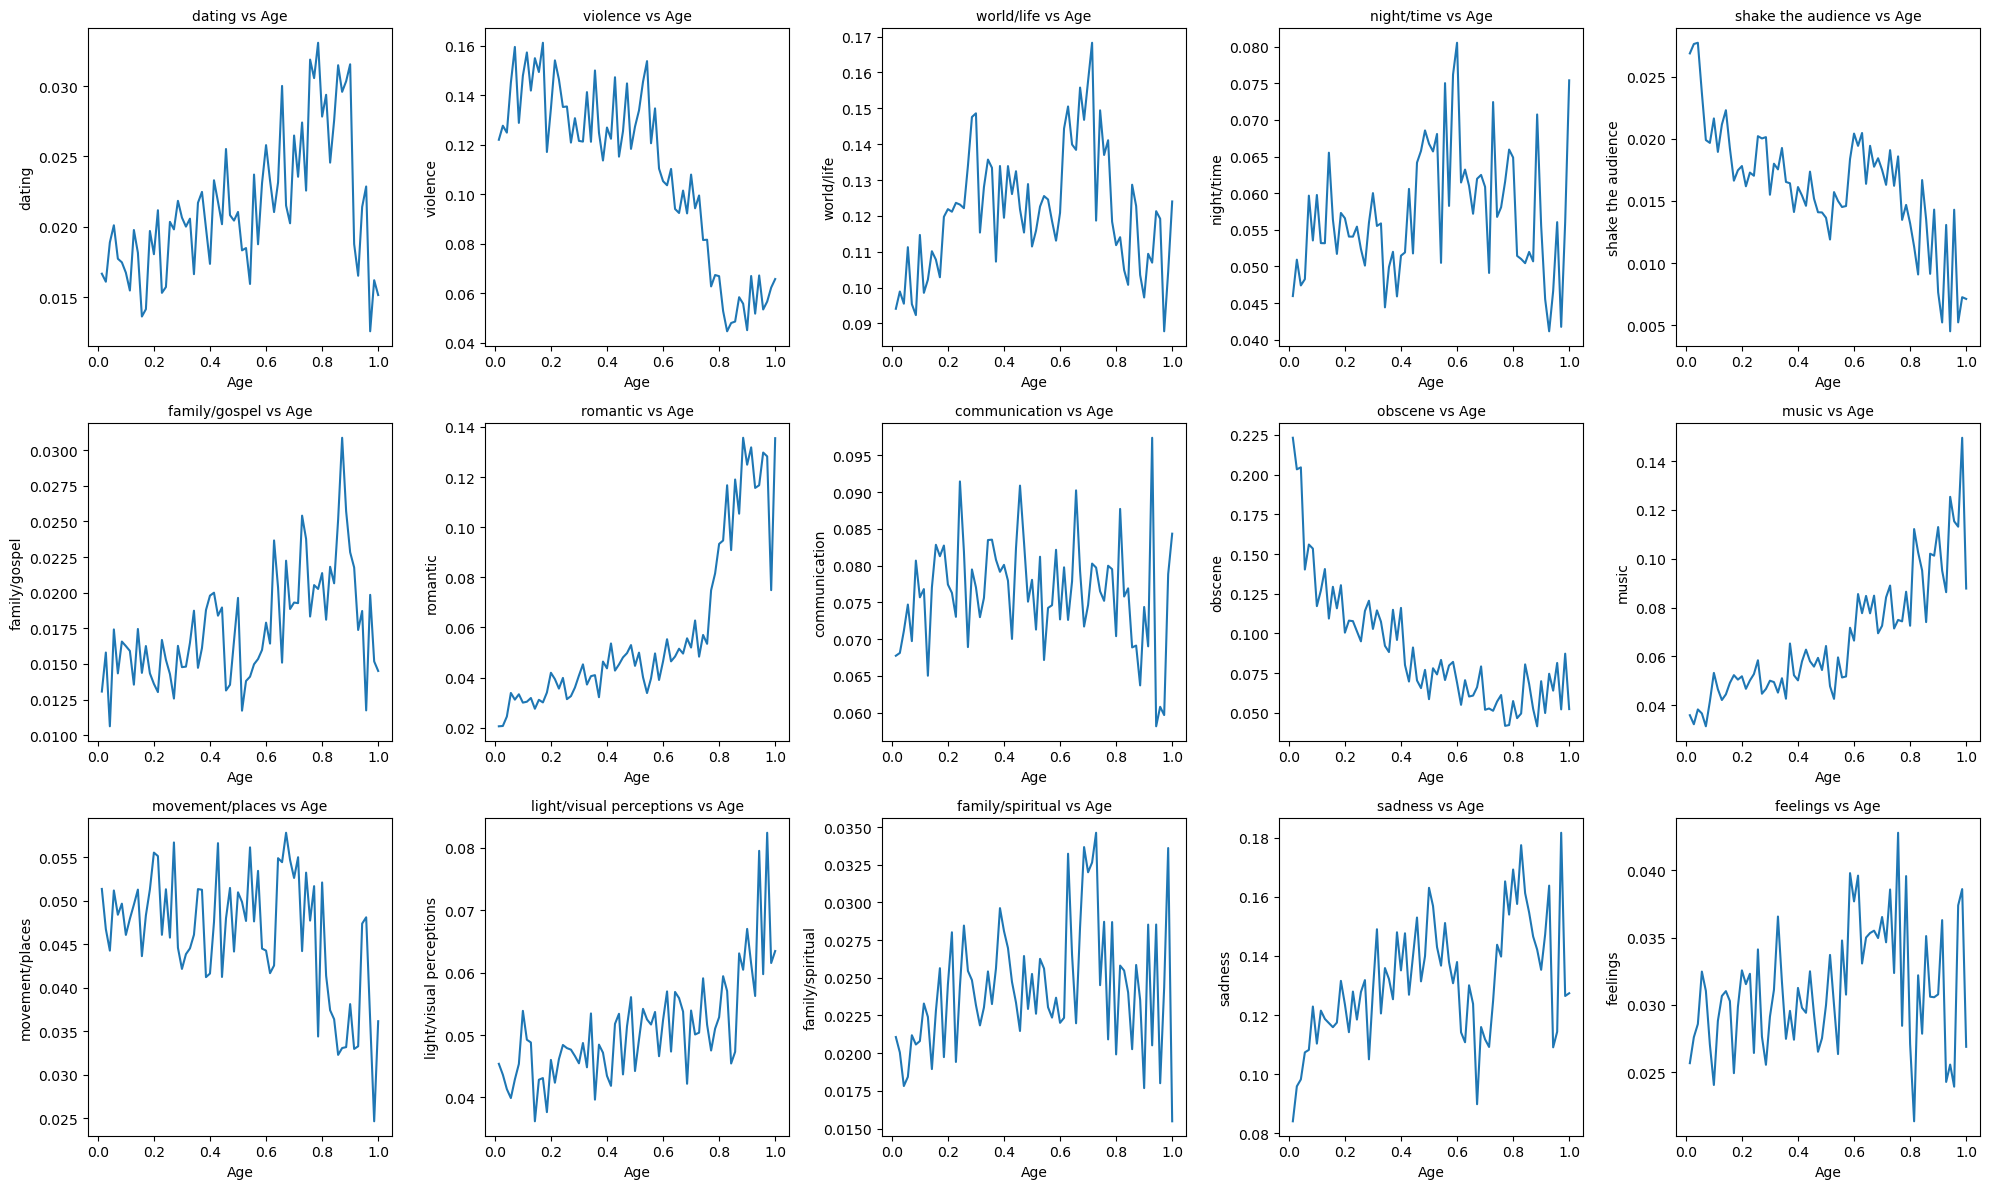

In [323]:
#Lets do the same thing but for feautres vs age using a line plot instead of a bar plot

features = [
    'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
    'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 
    'family/spiritual', 'sadness', 'feelings'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3 rows x 5 columns

for idx, feature in enumerate(features):
    row = idx // 5
    col = idx % 5
    ax = axes[row, col]
    
    sns.lineplot(data=df, x="age", y=feature, ax=ax, errorbar= None)
    ax.set_title(f'{feature} vs Age', fontsize=10)
    ax.set_xlabel("Age")
    ax.set_ylabel(feature)

plt.tight_layout()
None




## Age vs Features 

### Obscene content was huge in newer music
 - Songs with obscene lyrics (e.g., money, fame, explicit content) are much more common in recent music
- As we move toward older songs, that content drops dramatically
- This reflects how modern genres lean more into edgy, provocative themes
### Romance and Dating = Timeless, but rising 
- Themes of dating and romance increase with song age 
- Older tracks (higher age scores) are more likely to focus on emotional, interpersonal storytelling
- Classic love songs, and soulful expressions seem to shine here 
### Violence fades in older songs 
- Violent themes are more present in modern music, hip hop more popular now than older songs 
- A decline as you go into older eras 
### Shake the Audience = Modern hype
- Lyrics meant to excite or provoke are stronger in newer music
- As music ages, that energetic intensity fades
- This might reflect how older songs lean toward introspection, while modern hits bring the party
### Family and Spiritual values = Older music’s core
- Both family/gospel and family/spiritual themes peak in older songs
- Older music tends to center community, values, and spiritual reflection more often
- You feel the cultural roots and generational warmth here
### Sadness & Emotional depth in vintage music
- Sadness and emotional content like “feelings” are more common in older tracks
- Older genres (like blues and country) embraced vulnerability and storytelling
- These songs often tell deeply personal or reflective stories
### World/Life: A consistent presence
- Lyrics about life, society, or existential reflection stay pretty steady across time
- Every era has something to say about the world — just in different tones or styles
- This topic gives good background flavor but doesn't separate eras as strongly
### Music about music = More vintage
- Songs reflecting on music itself become more common in older tracks
- Think of tributes to musicians, stories about making music, or songs that celebrate music’s impact
- There's a sense of reverence and nostalgia here that newer tracks don’t focus on as much
### Communication grows with age
- Lyrics around talking, connecting, or understanding grow slightly with song age
- Older music might focus more on dialogue and emotional clarity


In [310]:
#Count of each topic
value_counts_topic = df['topic'].value_counts().to_frame()

value_counts_topic

,count
topic,
sadness,6094
violence,5707
world/life,5419
obscene,4881
music,2303
night/time,1823
romantic,1523
feelings,612


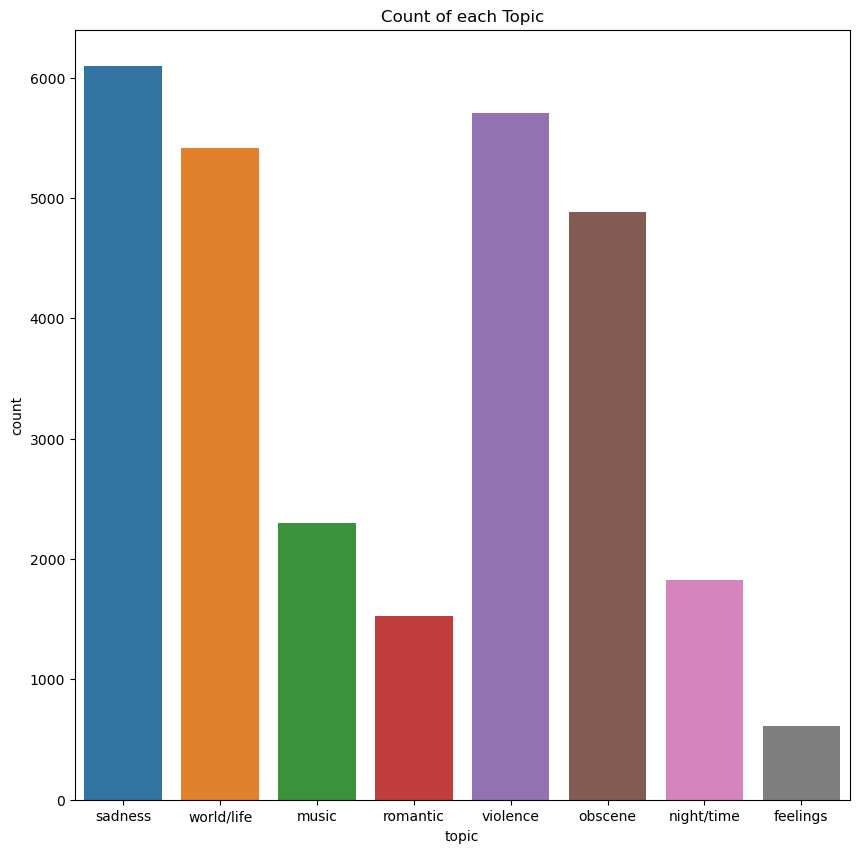

In [317]:
sns.countplot(df, x="topic", hue="topic")
plt.title("Count of each Topic")
None

## Sadness, Violence and Obscene are the 3 most topics in this music set 

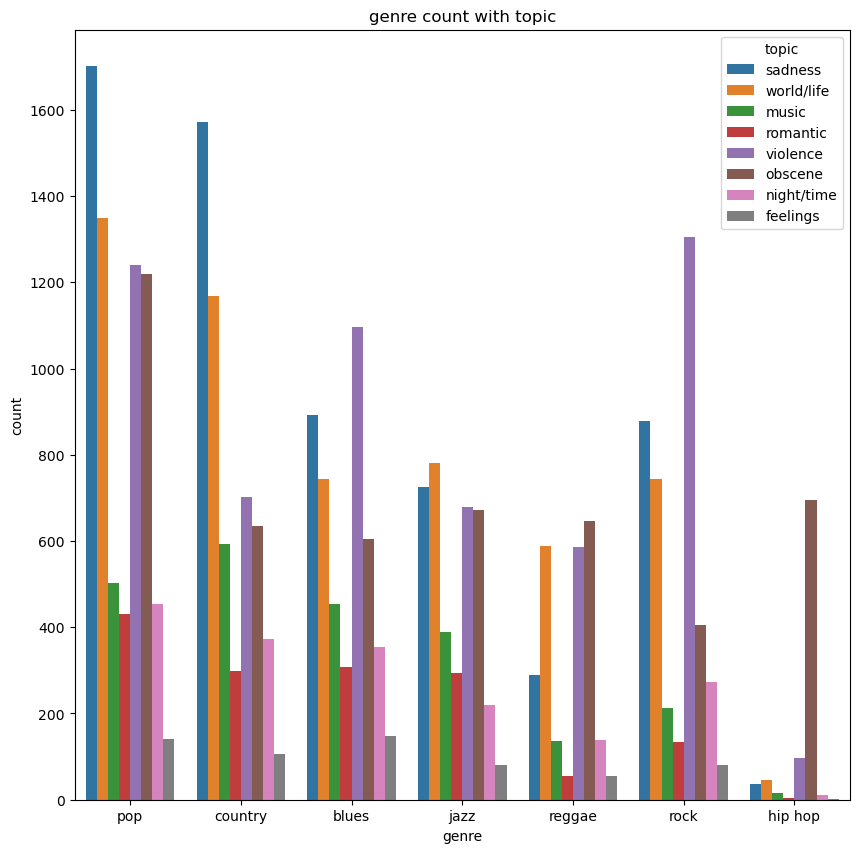

In [318]:
#Taking a deeping look into topic but having a genre hue
sns.countplot(data=df, x="genre", hue= "topic")
plt.title("genre count with topic")
None

- Sadness is popular within Pop and country
- Obscene and violence covers hip hop
- Violence has the highest cound in blues and rock (blues really ?)



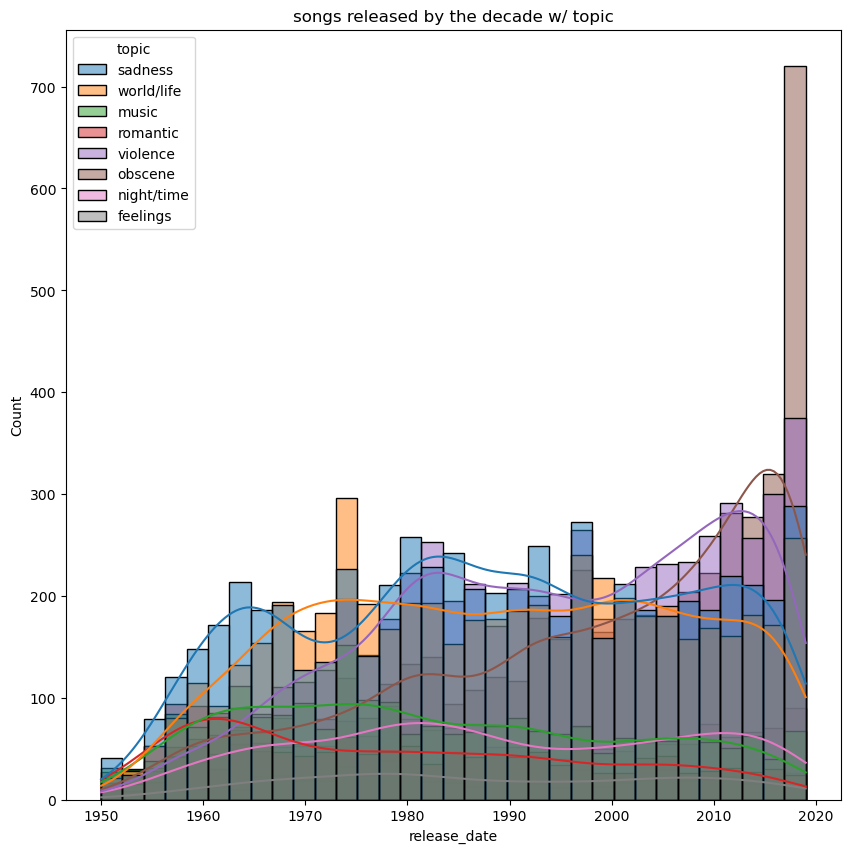

In [319]:
sns.histplot(df, x="release_date", hue="topic", kde=True)
plt.title("songs released by the decade w/ topic")
None

- The biggest peaks of music being realease were between 1970-1980, 1990-2000, 2010-2020
- Obscene music has becoming very popular during the later years by far than any other topic 

---

# Bivariate Analysis 

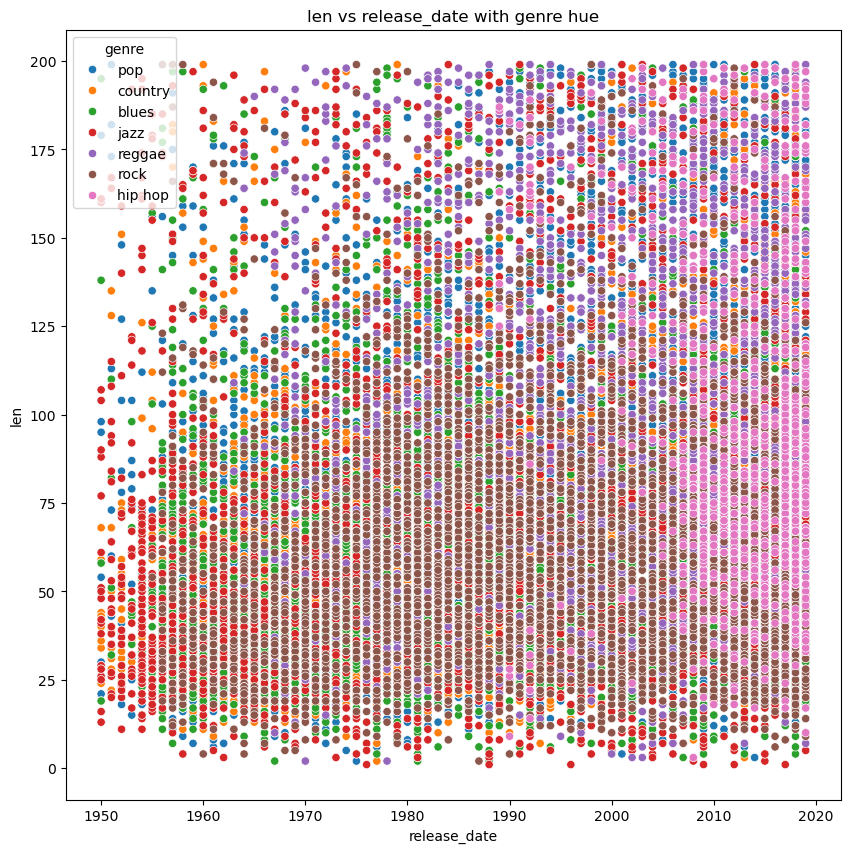

In [320]:
sns.scatterplot(df, x="release_date", y="len", hue="genre")
plt.title("len vs release_date with genre hue")
None

- Increase in the length in lyrics over time. 
- Hip Hop in the more modern years have the most songs with lyrical length. 
- Blues and Jazz are more visible earlier in the timeline pre-1970's
- Rock is seen alot here lyrics length as its known to be popular during 1960s-1980s 
   - you see it through all the era but decreases as we get to the modern era

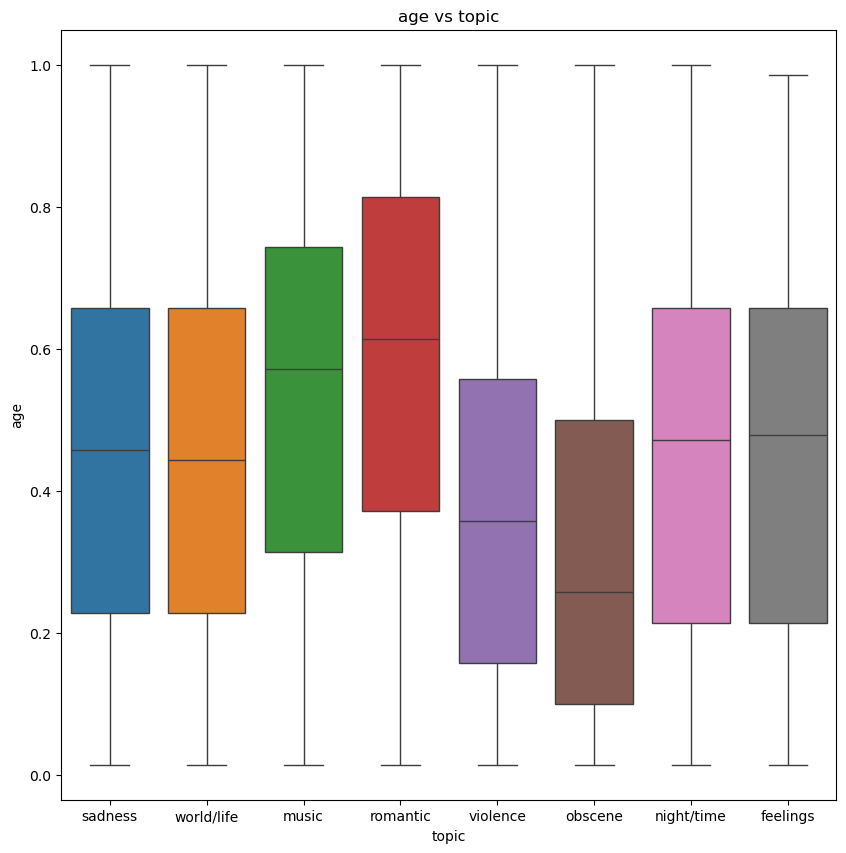

In [321]:
sns.boxplot(df, x="topic", y="age", hue="topic")
plt.title("age vs topic")
None


- No outliers here as this values fall in between 0 and 1 
- Romance & music tends to favor more older songs 
- Obscene & violence is more popular with newer songs 
- Sadness , world/life, night/time, feelings are more in the middle range of age of songs, can been seen in all eras 

---

# Multivarite Analysis 

In [262]:
#Dropping the tables that are object types and running a correlation on the remaining columns 
df_drop = df.drop(columns=['Unnamed: 0' , 'artist_name', 'track_name','topic', "genre" ,'lyrics'])
df_drop.corr()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
release_date,1.000000,0.261223,-0.062564,0.137581,-0.041635,-0.022696,0.072971,-0.054407,-0.191297,-0.002440,0.196165,-0.139894,0.019158,-0.048323,-0.030440,-0.064220,-0.022226,-1.000000
len,0.261223,1.000000,-0.020998,0.058199,-0.122548,-0.063615,0.096067,0.004529,-0.175072,-0.049004,0.438449,-0.091181,0.133841,-0.052886,-0.000781,-0.191908,-0.034350,-0.261223
dating,-0.062564,-0.020998,1.000000,-0.107301,-0.073612,0.034528,0.027052,0.009909,0.034701,-0.057430,-0.020485,-0.009179,-0.077992,-0.088505,-0.063318,-0.013200,0.025835,0.062564
violence,0.137581,0.058199,-0.107301,1.000000,-0.186943,-0.124094,-0.028129,-0.033674,-0.155305,-0.075842,-0.159645,-0.159059,-0.018301,-0.001586,0.071791,-0.221078,-0.081648,-0.137581
world/life,-0.041635,-0.122548,-0.073612,-0.186943,1.000000,-0.116153,-0.053845,-0.039443,-0.071869,-0.069718,-0.211483,-0.128626,-0.080311,-0.017409,0.022958,-0.159476,-0.053339,0.041635
night/time,-0.022696,-0.063615,0.034528,-0.124094,-0.116153,1.000000,-0.008592,-0.013432,-0.039565,-0.042581,-0.116909,-0.070387,-0.042634,-0.044641,-0.061812,-0.103806,-0.000128,0.022696
shake the audience,0.072971,0.096067,0.027052,-0.028129,-0.053845,-0.008592,1.000000,-0.004793,-0.038896,-0.055395,0.073948,-0.042646,-0.036539,-0.078519,-0.035060,-0.075282,0.012755,-0.072971
family/gospel,-0.054407,0.004529,0.009909,-0.033674,-0.039443,-0.013432,-0.004793,1.000000,-0.012494,-0.063134,-0.006199,0.010215,-0.006797,-0.069373,0.003200,-0.050716,-0.006504,0.054407
romantic,-0.191297,-0.175072,0.034701,-0.155305,-0.071869,-0.039565,-0.038896,-0.012494,1.000000,-0.019874,-0.158616,-0.041040,-0.098925,-0.001523,-0.062202,-0.044536,-0.022087,0.191297
communication,-0.002440,-0.049004,-0.057430,-0.075842,-0.069718,-0.042581,-0.055395,-0.063134,-0.019874,1.000000,-0.077732,-0.079232,-0.147935,-0.154008,-0.090960,-0.005896,-0.009150,0.002440


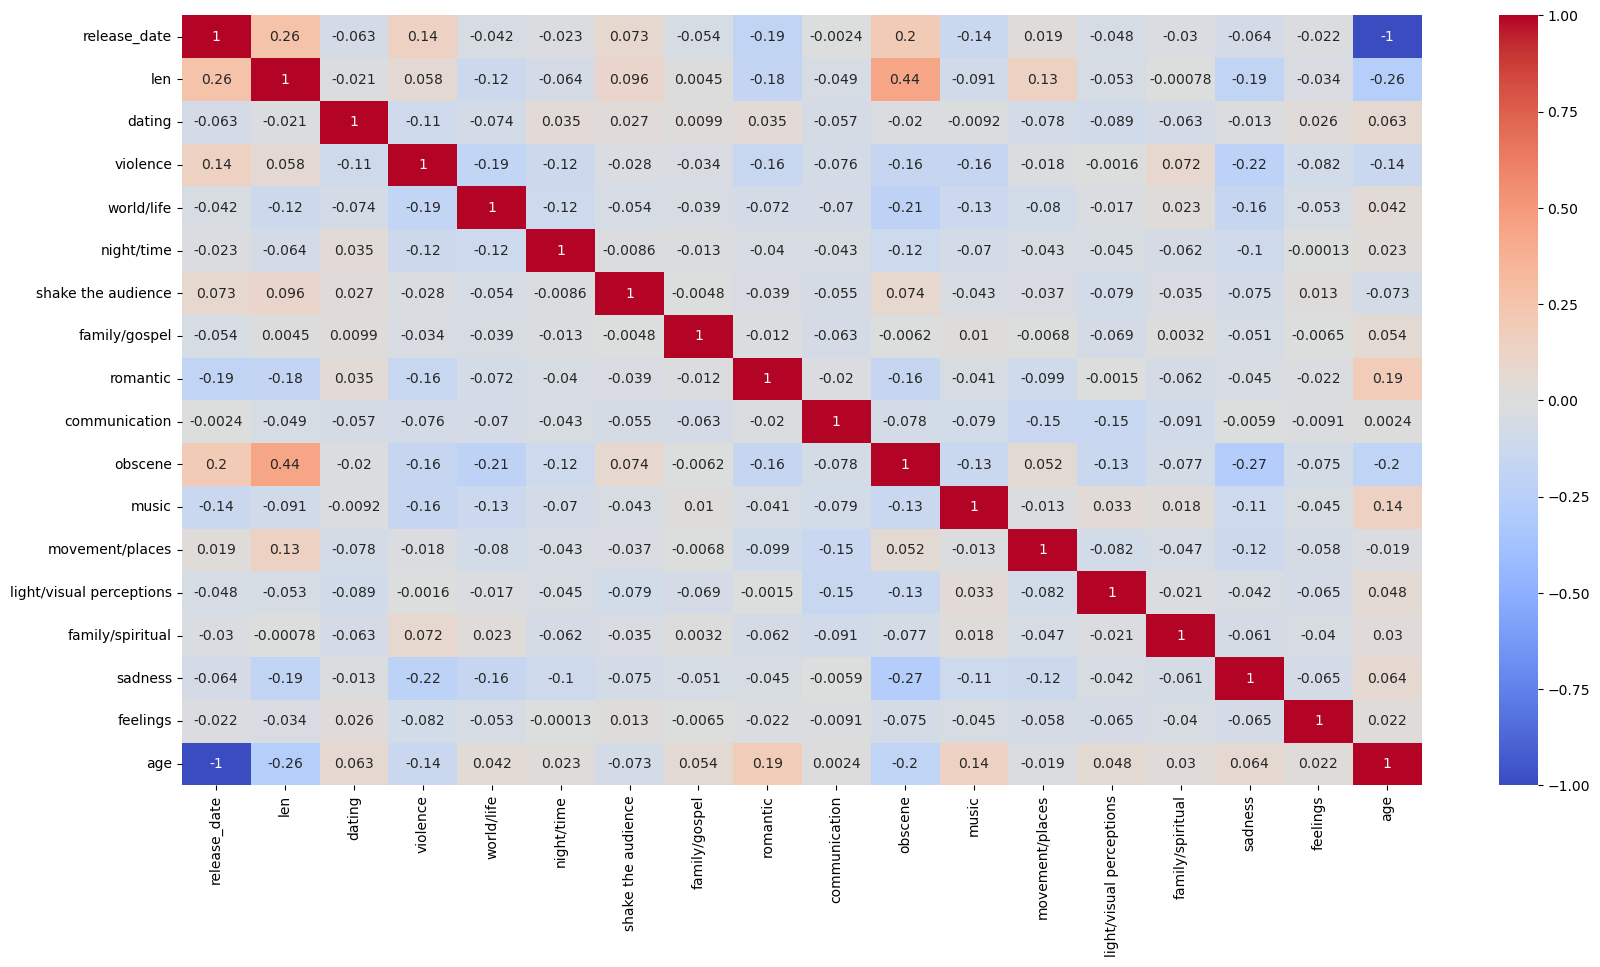

In [322]:
plt.figure(figsize=(20,10))
sns.heatmap(df_drop.corr(), annot=True, cmap='coolwarm')
None

## Release_date vs age had the strongest correlation

- lyrics length has Positive correlation with obscene – Suggests longer lyrics tend to be more explicit (possibly rap-heavy)
  - in the same light, Lyrics length has negative correlation with romantic, music &sadness – Slight, but might suggest shorter, punchier writing in emotionally-driven tracks
- Movement/places and shake the audience also show mild positive correlation with Lyrics lenght

- Communication and family/spiritual are pretty independent 
  -  very low correlations with almost everything 

- Obscence , violence and shake the audience trend positively with release_date (newer songs), and negtively with age (older songs)